# Definition labels for dict

In [1]:
import os
import numpy as np
import cv2 as cv
import itertools
import time
import mediapipe as mp
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [2]:
actions = np.array(['a', 'aku', 'anda', 'b', 'c', 'd', 'e', 'kamu', 'saya', 'selamat pagi', 'selamat siang'])

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'a': 0,
 'aku': 1,
 'anda': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'kamu': 7,
 'saya': 8,
 'selamat pagi': 9,
 'selamat siang': 10}

# Collect Data From Folde

In [5]:
Path = 'Dataset/'
no_squence = 100
squence_length = 30

squences, labels = [], []
for action in os.listdir(Path):
    for squence in range(no_squence):
        window = []
        for frame_num in range(squence_length):
            res = np.load(os.path.join(Path, action, str(squence), "{}.npy".format(frame_num)))
            window.append(res)
        squences.append(window)
        labels.append(label_map[action])
#         print(f"{len(squence)} sample\t labels : {folders}")
print(f"{len(squences)}")
print(f"{len(labels)}")

1100
1100


In [6]:
np.array(labels).shape

(1100,)

In [7]:
x = np.array(squences)

In [8]:
x.shape

(1100, 30, 1662)

In [9]:
y = to_categorical(labels).astype(int)

In [10]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# Split Dataset  

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
print(x_train.shape, x_test.shape)

(880, 30, 1662) (220, 30, 1662)


# Build Model

In [13]:
log_dir = os.path.join('Logsss2')
tg_callb = TensorBoard(log_dir = log_dir )

In [14]:
def lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape=input_shape))
    model.add(LSTM(64, return_sequences = True, activation = 'relu'))
    model.add(LSTM(128, return_sequences = True, activation = 'relu'))
    model.add(LSTM(128, return_sequences = False, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(actions.shape[0], activation = 'softmax'))
    
    model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [15]:
input_shape = (30, 1662)
model = lstm_model(input_shape)
history = model.fit(x_train, y_train, epochs = 250, validation_split = 0.15, batch_size = 16, callbacks = [tg_callb])

Epoch 1/250
47/47 [==============================] - 10s 111ms/step - loss: 22.3335 - accuracy: 0.0989 - val_loss: 34.1727 - val_accuracy: 0.1061
Epoch 2/250
47/47 [==============================] - 5s 99ms/step - loss: 26.9053 - accuracy: 0.0869 - val_loss: 11.0888 - val_accuracy: 0.1288
Epoch 3/250
47/47 [==============================] - 5s 104ms/step - loss: 44.0555 - accuracy: 0.0842 - val_loss: 4.7958 - val_accuracy: 0.1061
Epoch 4/250
47/47 [==============================] - 4s 91ms/step - loss: 6.8658 - accuracy: 0.0802 - val_loss: 2.6025 - val_accuracy: 0.0682
Epoch 5/250
47/47 [==============================] - 4s 94ms/step - loss: 2.4036 - accuracy: 0.0963 - val_loss: 2.5517 - val_accuracy: 0.0682
Epoch 6/250
47/47 [==============================] - 4s 92ms/step - loss: 2.4304 - accuracy: 0.0963 - val_loss: 2.4039 - val_accuracy: 0.0682
Epoch 7/250
47/47 [==============================] - 4s 89ms/step - loss: 2.3988 - accuracy: 0.0963 - val_loss: 2.3998 - val_accuracy: 0.068

# Model Prediction

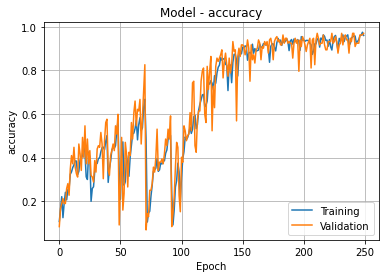

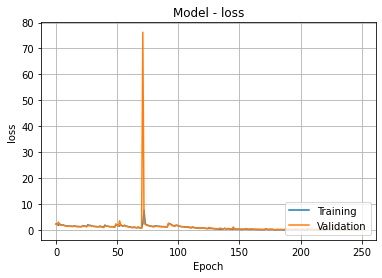

In [93]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

In [94]:
model.predict(x_test)

array([[3.26e-07, 8.72e-15, 1.46e-11, ..., 3.49e-16, 2.08e-16, 1.49e-12],
       [8.72e-09, 3.12e-03, 6.23e-09, ..., 5.49e-01, 4.46e-05, 5.71e-10],
       [8.24e-04, 6.90e-12, 1.98e-08, ..., 8.93e-11, 1.57e-13, 8.76e-14],
       ...,
       [1.34e-10, 2.23e-07, 7.03e-13, ..., 1.74e-05, 9.92e-01, 1.76e-08],
       [3.14e-17, 2.42e-20, 5.53e-25, ..., 1.51e-15, 4.63e-08, 9.51e-01],
       [1.86e-03, 1.93e-10, 3.50e-07, ..., 3.63e-09, 3.05e-12, 2.66e-12]],
      dtype=float32)

In [95]:
actions[np.argmax(res[0])]

'a'

In [96]:
actions[np.argmax(y_test[0])]

'b'

In [97]:
model.save('newModel7.h5')

# Evaluate Model

In [98]:
# model_predict = load_model('newModel2.h5')

In [99]:
yhat = model.predict(x_train)

In [100]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [101]:
ypred = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1),
                           ypred.argmax(axis=1),
                           target_names = label_map))

               precision    recall  f1-score   support

            a       0.93      1.00      0.97        14
          aku       1.00      0.97      0.99        36
         anda       1.00      1.00      1.00        22
            b       1.00      0.94      0.97        16
            c       1.00      0.93      0.97        15
            d       0.96      0.96      0.96        24
            e       0.96      0.96      0.96        23
         kamu       0.86      0.67      0.75        18
         saya       0.95      0.95      0.95        19
 selamat pagi       0.79      1.00      0.88        11
selamat siang       0.84      0.95      0.89        22

     accuracy                           0.94       220
    macro avg       0.93      0.94      0.93       220
 weighted avg       0.94      0.94      0.94       220



In [102]:
accuracy_score(ytrue, yhat)

0.975

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

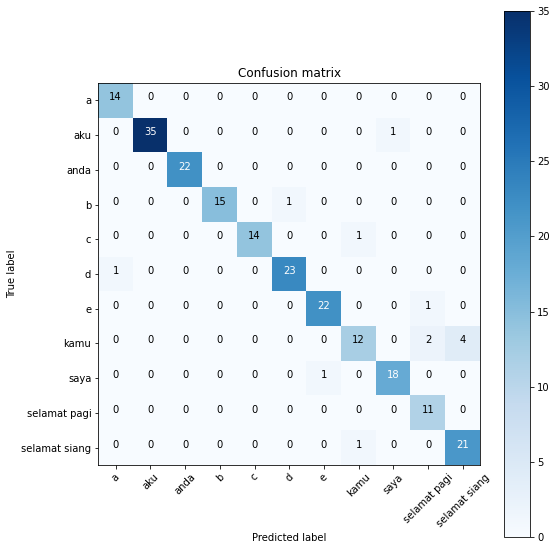

In [104]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), ypred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_map,normalize=False,
                      title='Confusion matrix')

# Testing

In [14]:
mp_holistic = mp.solutions.holistic # Holistic Model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [15]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False
    result = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, result

In [16]:
def draw_landmarks(image, result):
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [17]:
def style_draw_landmark(image, result):
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

In [18]:
def extract_keypoints(result):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, rh, lh])

In [19]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
#         cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 360+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
model = load_model('newModel7.h5')
print("[INFO] finish load model...")

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        style_draw_landmark(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

[INFO] finish load model...
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'm

<class 'mediapipe.python.solution_base.SolutionOutputs'>
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
e
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat pagi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.SolutionOutputs'>
selamat siang
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kamu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base

<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
d
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.Solut